In [23]:
import spacy
import pandas as pd

data = pd.read_csv('theGuardian_articles(FINAL).csv')
data

,title,date,url,full text
0,"Succession recap: season four, episode two – t...",2023-04-03,https://www.theguardian.com/tv-and-radio/2023/...,"On one hand, we get an epic, Shakespearean mot..."
1,"The trauma doctor: Gabor Maté on happiness, ho...",2023-04-12,https://www.theguardian.com/lifeandstyle/2023/...,"The physician, author and self-help guru came ..."
2,"Five Great Reads: mortality (grappled with), m...",2023-04-14,https://www.theguardian.com/australia-news/202...,Guardian Australia’s weekend wrap of essential...
3,Afternoon Update: Coalition reshuffle promotes...,2023-04-18,https://www.theguardian.com/australia-news/202...,Want to get this in your inbox every weekday? ...
4,Arsenal liaising with police over antisemitic ...,2023-05-12,https://www.theguardian.com/football/2023/may/...,Arsenal are liaising with the police over anti...
...,...,...,...,...
357,Monday briefing: The ‘unprecedented’ pressure ...,2024-04-08,https://www.theguardian.com/world/2024/apr/08/...,In today’s newsletter: The killing of aid work...
358,Museum loses anti-discrimination case – as it ...,2024-04-09,https://www.theguardian.com/australia-news/liv...,This blog is now closed.\nA flurry of late-bre...
359,Food aid to Gaza ‘three times more likely’ to ...,2024-04-09,https://www.theguardian.com/world/live/2024/ap...,"This live blog is now closed, you can read mor..."
360,Middle East crisis live: Israel threatens to s...,2024-04-10,https://www.theguardian.com/world/live/2024/ap...,Israel’s foreign minister says Israel will att...


In [24]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def clean_text(text):
    '''reduce text to lower-case lexicon entry'''
    lemmas = [token.lemma_ for token in nlp(text)
              if token.pos_ in {'NOUN', 'VERB', 'ADJ', 'ADV', 'PROPN'}]
    return ' '.join(lemmas)

data['clean_text'] = data['full text'].apply(clean_text)
data['clean_text']

0      hand get epic shakespearean motivational speec...
1      physician author self help guru come worldwide...
2      Guardian Australia weekend wrap essential read...
3      want get inbox weekday sign Afternoon Update h...
4      arsenal liaise police antisemitic post send Wh...
                             ...                        
357    today newsletter killing aid worker Gaza last ...
358    blog now close flurry late break news end Tues...
359    live blog now close read more story here Israe...
360    Israel foreign minister say Israel attack Iran...
361    University Southern California cancel valedict...
Name: clean_text, Length: 362, dtype: object

In [25]:
import nltk
nltk.downloader.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/imamabdullah/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/imamabdullah/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.preprocessing import LabelEncoder

sid = SentimentIntensityAnalyzer()

sentiments = []
for description in data['clean_text']:
    sentiment_scores = sid.polarity_scores(description)
     
    sentiment = 'pos' if sentiment_scores['compound'] > 0 else 'neg'
    sentiments.append(sentiment)

data['sentiment'] = sentiments

labels2numbers = LabelEncoder()
data['sentiment#'] = labels2numbers.fit_transform(data['sentiment'].astype('str'))

sentiments = []
for description in data['clean_text']:
    sentiment_scores = sid.polarity_scores(description)
    sentiment = ''
    for key in sorted(sentiment_scores):
        sentiment += '{0}: {1}, '.format(key, sentiment_scores[key])
    sentiments.append(sentiment)

data['sentiment##'] = sentiments
print(data.head())

                                               title        date  \
0  Succession recap: season four, episode two – t...  2023-04-03   
1  The trauma doctor: Gabor Maté on happiness, ho...  2023-04-12   
2  Five Great Reads: mortality (grappled with), m...  2023-04-14   
3  Afternoon Update: Coalition reshuffle promotes...  2023-04-18   
4  Arsenal liaising with police over antisemitic ...  2023-05-12   

                                                 url  \
0  https://www.theguardian.com/tv-and-radio/2023/...   
1  https://www.theguardian.com/lifeandstyle/2023/...   
2  https://www.theguardian.com/australia-news/202...   
3  https://www.theguardian.com/australia-news/202...   
4  https://www.theguardian.com/football/2023/may/...   

                                           full text  \
0  On one hand, we get an epic, Shakespearean mot...   
1  The physician, author and self-help guru came ...   
2  Guardian Australia’s weekend wrap of essential...   
3  Want to get this in your in

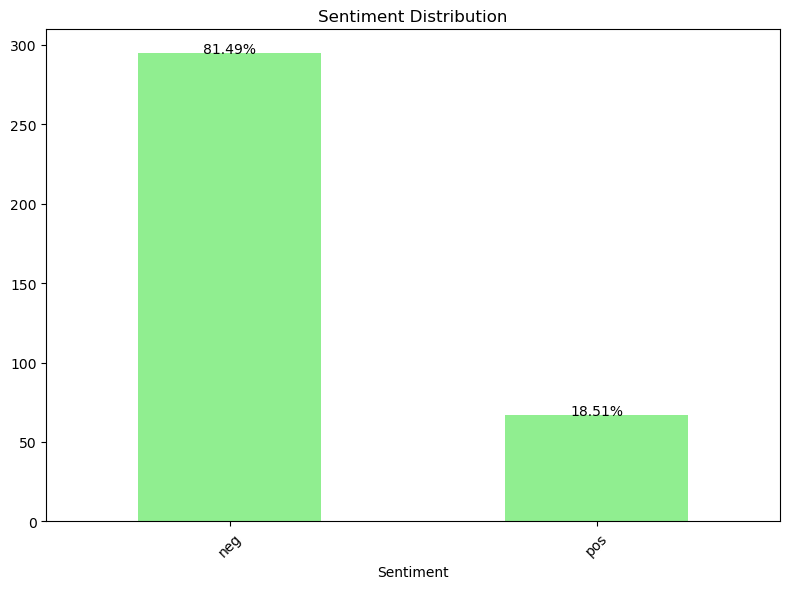

In [27]:
import matplotlib.pyplot as plt
sentiment_counts = data['sentiment'].value_counts()
total_count = sentiment_counts.sum()
percentages = (sentiment_counts / total_count) * 100

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color='lightgreen')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('')
plt.xticks(rotation=45)
plt.tight_layout()

# Add labels in percentage format for each bar
for i, count in enumerate(sentiment_counts):
    percentage = percentages[i]
    plt.text(i, count + 0.1, f'{percentage:.2f}%', ha='center')

plt.show()

In [29]:
# Convert 'date' column to datetime 
data['date'] = pd.to_datetime(data['date'])

# Extract month and year from 'date' column
data['m/y'] = data['date'].dt.strftime('%m/%Y')

# Display the DataFrame with the new 'm/y' column
print(data.head())

                                               title       date  \
0  Succession recap: season four, episode two – t... 2023-04-03   
1  The trauma doctor: Gabor Maté on happiness, ho... 2023-04-12   
2  Five Great Reads: mortality (grappled with), m... 2023-04-14   
3  Afternoon Update: Coalition reshuffle promotes... 2023-04-18   
4  Arsenal liaising with police over antisemitic ... 2023-05-12   

                                                 url  \
0  https://www.theguardian.com/tv-and-radio/2023/...   
1  https://www.theguardian.com/lifeandstyle/2023/...   
2  https://www.theguardian.com/australia-news/202...   
3  https://www.theguardian.com/australia-news/202...   
4  https://www.theguardian.com/football/2023/may/...   

                                           full text  \
0  On one hand, we get an epic, Shakespearean mot...   
1  The physician, author and self-help guru came ...   
2  Guardian Australia’s weekend wrap of essential...   
3  Want to get this in your inbox ev

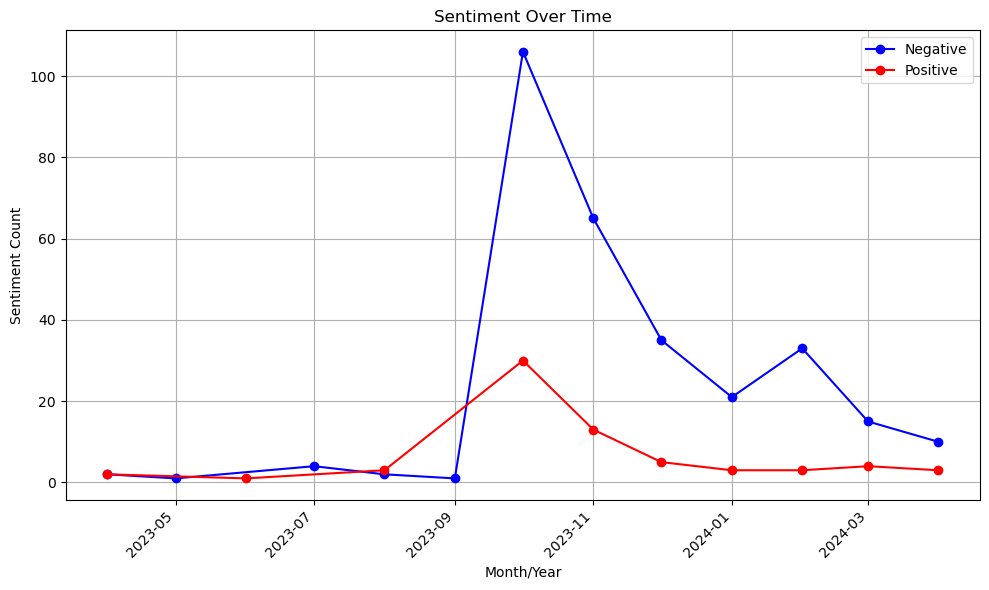

In [30]:
data['m/y'] = pd.to_datetime(data['m/y'])

# Sort data by 'm/y' in chronological order
sorted_data = data.sort_values('m/y')

# Group sorted data by 'm/y' and calculate the average sentiment for each month
monthly_sentiment_0 = sorted_data[sorted_data['sentiment#'] == 0].groupby('m/y')['sentiment#'].count()
monthly_sentiment_1 = sorted_data[sorted_data['sentiment#'] == 1].groupby('m/y')['sentiment#'].count()

# Plot the line plot
plt.figure(figsize=(10, 6))
monthly_sentiment_0.plot(kind='line', marker='o', color='b', label='Negative')
monthly_sentiment_1.plot(kind='line', marker='o', color='r', label='Positive')
plt.title('Sentiment Over Time')
plt.xlabel('Month/Year')
plt.ylabel('Sentiment Count')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

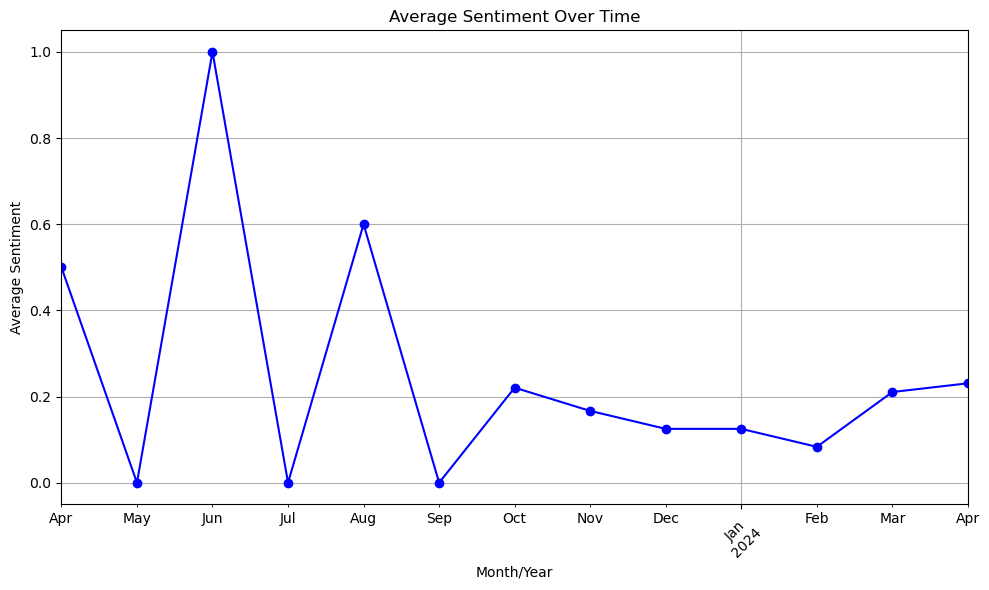

In [31]:

# Convert 'm/y' column to datetime type
data['m/y'] = pd.to_datetime(data['m/y'])

# Sort data by 'm/y' in chronological order
sorted_data = data.sort_values('m/y')

# Group sorted data by 'm/y' and calculate the average sentiment for each month
monthly_sentiment = sorted_data.groupby('m/y')['sentiment#'].mean()

# Plot the line plot
plt.figure(figsize=(10, 6))
monthly_sentiment.plot(kind='line', marker='o', color='b')
plt.title('Average Sentiment Over Time')
plt.xlabel('Month/Year')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()